In [1]:
import pandas as pd
import numpy as np
import csv
import requests
import pprint
from sklearn.linear_model import LinearRegression

In [2]:
r = requests.get('https://waterdata.usgs.gov/ca/nwis/water_use?format=html_table&rdb_compression=file&wu_area=County&wu_year=ALL&wu_county=ALL&wu_category=ALL&wu_county_nms=--ALL%2BCounties--&wu_category_nms=--ALL%2BCategories--')
df_list = pd.read_html(r.text)
df = df_list[1]

df

,State Code,State Name,County Code,County Name,Year,"Total Population total population of area, in thousands","Public Supply population served by groundwater, in thousands","Public Supply population served by surface water, in thousands","Public Supply total population served, in thousands","Public Supply self-supplied groundwater withdrawals, fresh, in Mgal/d",...,"Hydroelectric Power power generated by instream use, in gigawatt-hours","Hydroelectric Power power generated by offstream use, in gigawatt-hours","Hydroelectric Power total power generated, in gigawatt-hours",Hydroelectric Power number of instream facilities,Hydroelectric Power number of offstream facilities,Hydroelectric Power total number of facilities,"Wastewater Treatment returns by public wastewater facilities, in Mgal/d",Wastewater Treatment number of public wastewater facilities,Wastewater Treatment number of wastewater facilities,"Wastewater Treatment reclaimed wastewater released by wastewater facilities, in Mgal/d"
0,6,California,1,Alameda County,1985,1195.160,185.950,967.160,1153.110,31.58,...,0.00,-,-,-,-,-,142.32,7,-,-
1,6,California,1,Alameda County,1990,1279.180,109.370,1142.440,1251.810,23.83,...,0.00,-,-,0,-,-,134.59,8,-,-
2,6,California,1,Alameda County,1995,1347.700,165.830,1162.820,1328.650,31.05,...,0.00,0.00,0.00,0,0,0,154.15,8,-,-
3,6,California,1,Alameda County,2000,1443.740,152.460,1114.420,1266.880,26.70,...,-,-,-,-,-,-,-,-,-,-
4,6,California,1,Alameda County,2005,1448.905,477.712,955.782,1433.494,52.19,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,6,California,115,Yuba County,1995,62.300,46.100,0.000,46.100,8.59,...,0.00,2155.67,2155.67,0,4,4,5.26,5,-,-
402,6,California,115,Yuba County,2000,60.220,37.220,2.110,39.330,10.63,...,-,-,-,-,-,-,-,-,-,-
403,6,California,115,Yuba County,2005,67.153,21.474,21.091,42.565,7.17,...,-,-,-,-,-,-,-,-,-,-
404,6,California,115,Yuba County,2010,72.155,56.940,3.750,60.690,10.12,...,-,-,-,-,-,-,-,-,-,-


In [3]:
pprint.pprint(list(filter(lambda x: "total" in x, df.keys())))

['Total Population total population of area, in thousands',
 'Public Supply total population served, in thousands',
 'Public Supply total self-supplied withdrawals, groundwater, in Mgal/d',
 'Public Supply total self-supplied withdrawals, surface water, in Mgal/d',
 'Public Supply total self-supplied withdrawals, fresh, in Mgal/d',
 'Public Supply total self-supplied withdrawals, saline, in Mgal/d',
 'Public Supply total self-supplied withdrawals, total, in Mgal/d',
 'Public Supply total deliveries, in Mgal/d',
 'Domestic total self-supplied withdrawals, groundwater, in Mgal/d',
 'Domestic total self-supplied withdrawals, surface water, in Mgal/d',
 'Domestic total self-supplied withdrawals, fresh, in Mgal/d',
 'Domestic total self-supplied withdrawals, saline, in Mgal/d',
 'Domestic total self-supplied withdrawals, in Mgal/d',
 'Domestic total self-supplied withdrawals plus deliveries, in Mgal/d',
 'Domestic total consumptive use, in Mgal/d',
 'Commercial total self-supplied withdrawa

In [4]:
population = df['Total Population total population of area, in thousands']
domestic = df['Domestic total consumptive use, in Mgal/d']
commercial = df['Commercial total consumptive use, in Mgal/d']
aquacultural = df['Aquaculture total consumptive use, in Mgal/d']
industrial = df['Industrial total consumptive use, in Mgal/d']
livestock = df['Livestock (Animal Specialties) total consumptive use, in Mgal/d']
irrigation = df['Irrigation, Total total consumptive use, in Mgal/d']
thermoelectric = df['Thermoelectric Power (Closed-loop cooling) total consumptive use, in Mgal/d']
mining = df['Mining total consumptive use, in Mgal/d']

In [5]:
# domestic = list(map(np.float64, [i for i in domestic if i != '-']))
# commercial = list(map(np.float64, [i for i in commercial if i != '-']))
# aquacultural = list(map(np.float64, [i for i in aquacultural if i != '-']))
# industrial = list(map(np.float64, [i for i in industrial if i != '-']))
# livestock = list(map(np.float64, [i for i in livestock if i != '-']))
# irrigation = list(map(np.float64, [i for i in irrigation if i != '-']))
# thermoelectric = list(map(np.float64, [i for i in thermoelectric if i != '-']))
# mining = list(map(np.float64, [i for i in mining if i != '-']))

def match_data(cat1, cat2):
    new_cat1 = []
    new_cat2 = []
    for i in range(len(cat1)): 
        if not cat2[i] == "-":
            new_cat1.append(cat1[i])
            new_cat2.append(cat2[i])

    new_cat2 = list(map(np.float64, new_cat2))
    return new_cat1, new_cat2

aquacultural

0      -
1      -
2      -
3      -
4      -
      ..
401    -
402    -
403    -
404    -
405    -
Name: Aquaculture total consumptive use, in Mgal/d, Length: 406, dtype: object

<module 'matplotlib.pyplot' from '/home/ace/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

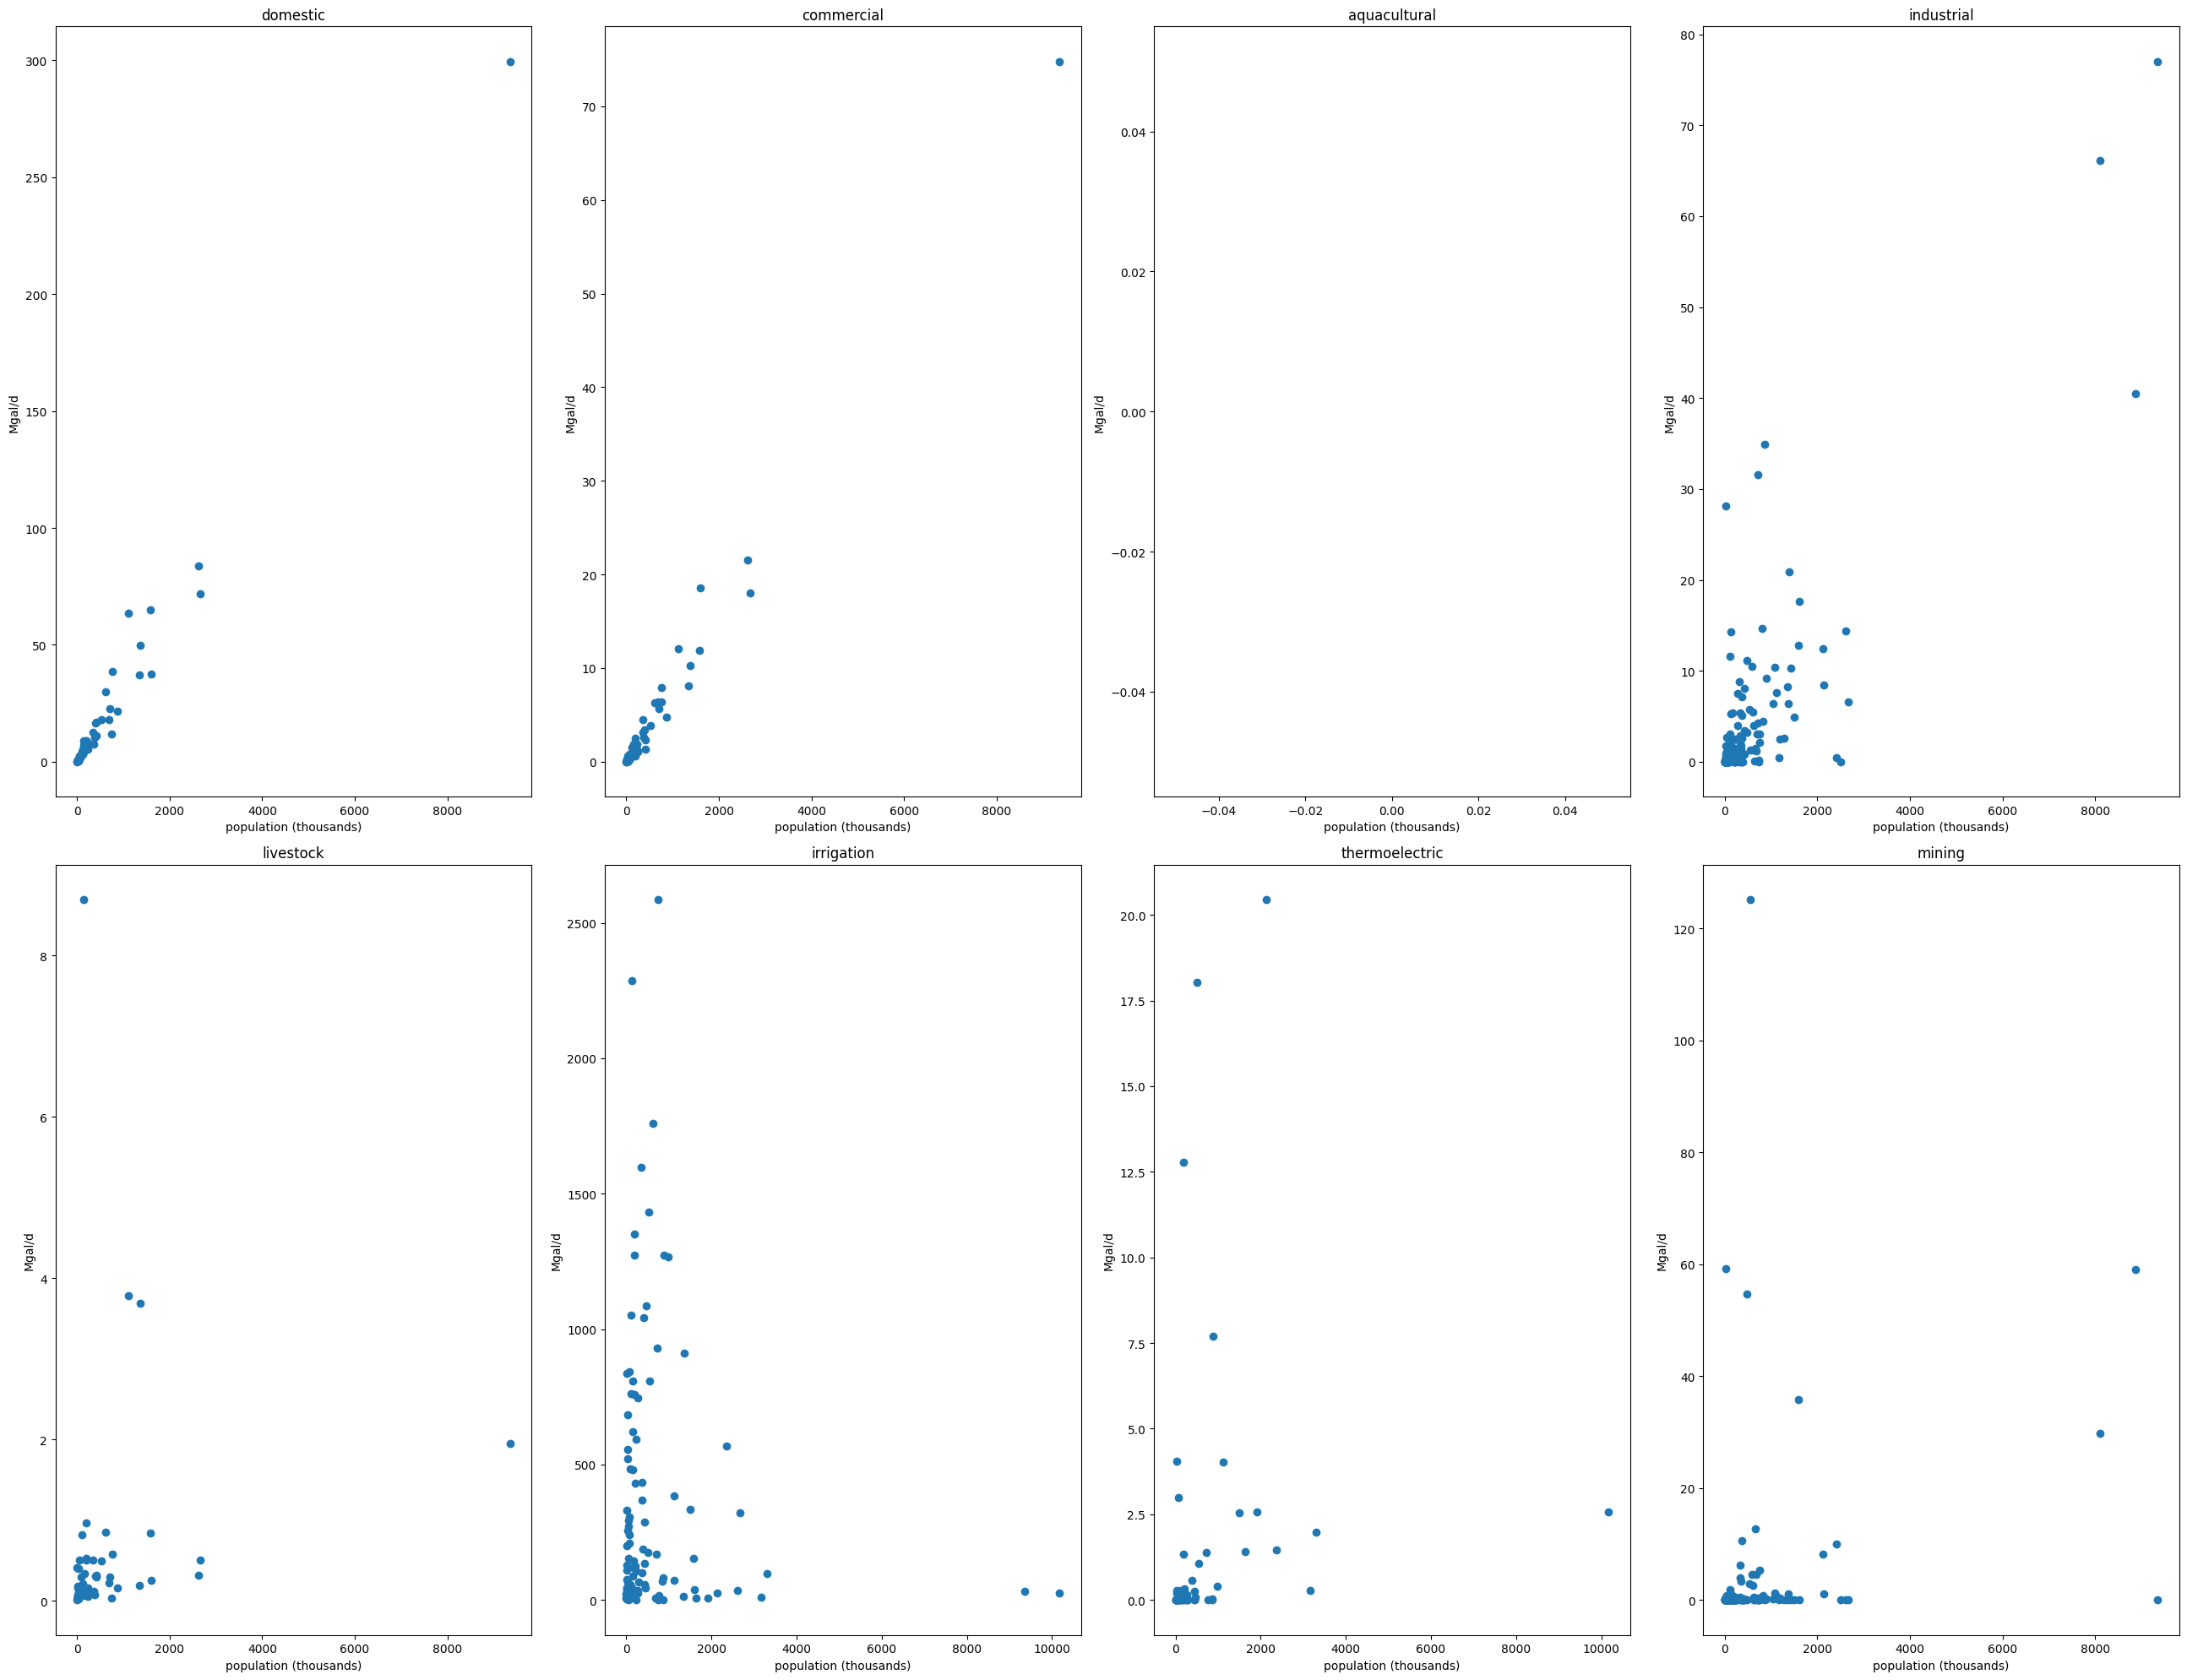

In [6]:
import matplotlib.pyplot as plt
plt.subplots(nrows=2, ncols=4, figsize=(26, 20))

plt.subplot(2, 4, 1)
plt.xlabel('population (thousands)')
plt.ylabel('Mgal/d')
plt.scatter(*match_data(population, domestic))
plt.title('domestic')

plt.subplot(2, 4, 2)
plt.xlabel('population (thousands)')
plt.ylabel('Mgal/d')
plt.scatter(*match_data(population, commercial))
plt.title('commercial')

plt.subplot(2, 4, 3)
plt.xlabel('population (thousands)')
plt.ylabel('Mgal/d')
plt.scatter(*match_data(population, aquacultural))
plt.title('aquacultural')

plt.subplot(2, 4, 4)
plt.xlabel('population (thousands)')
plt.ylabel('Mgal/d')
plt.scatter(*match_data(population, industrial))
plt.title('industrial')

plt.subplot(2, 4, 5)
plt.xlabel('population (thousands)')
plt.ylabel('Mgal/d')
plt.scatter(*match_data(population, livestock))
plt.title('livestock')

plt.subplot(2, 4, 6)
plt.xlabel('population (thousands)')
plt.ylabel('Mgal/d')
plt.scatter(*match_data(population, irrigation))
plt.title('irrigation')

plt.subplot(2, 4, 7)
plt.xlabel('population (thousands)')
plt.ylabel('Mgal/d')
plt.scatter(*match_data(population, thermoelectric))
plt.title('thermoelectric')

plt.subplot(2, 4, 8)
plt.xlabel('population (thousands)')
plt.ylabel('Mgal/d')
plt.scatter(*match_data(population, mining))
plt.title('mining')

plt.tight_layout()
plt

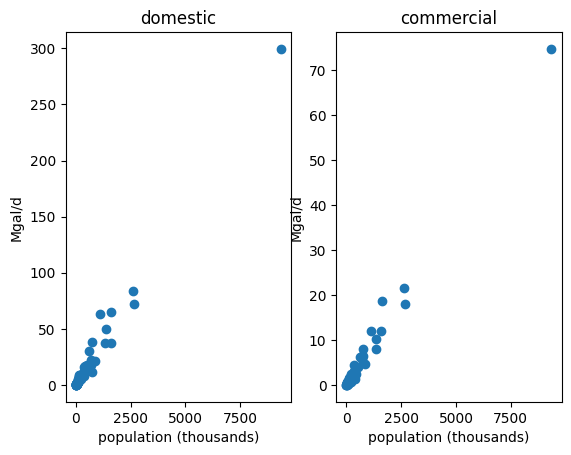

In [7]:
# variables: modeling for domestic and commercial use

plt.subplot(1, 2, 1)
plt.xlabel('population (thousands)')
plt.ylabel('Mgal/d')
plt.scatter(*match_data(population, domestic))
plt.title('domestic')

plt.subplot(1, 2, 2)
plt.xlabel('population (thousands)')
plt.ylabel('Mgal/d')
plt.scatter(*match_data(population, commercial))
plt.title('commercial')

plt.savefig("domestic_commercial_plots")

y = 0.7017847379565509 + [0.03181906] * x


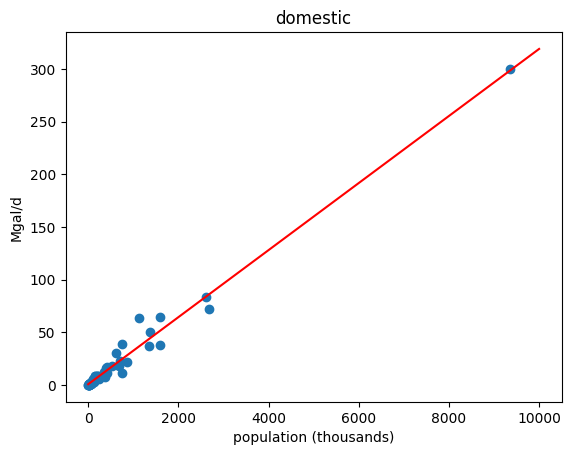

In [8]:
# population vs domestic water use
x_1, y_1 = match_data(population, domestic)
x_1 = np.array(x_1).reshape((-1, 1))
y_1 = np.array(y_1)
model_1 = LinearRegression().fit(x_1, y_1)

model_1.score(x_1, y_1)

x = np.linspace(0, 10000, 100)

y_eq = model_1.intercept_ + model_1.coef_ * x

print(f"y = {model_1.intercept_} + {model_1.coef_} * x")

plt.clf()

plt.xlabel('population (thousands)')
plt.ylabel('Mgal/d')
plt.scatter(*match_data(population, domestic))
plt.title('domestic')

plt.plot(x, y_eq, 'r')

plt.savefig("domestic")

y = 0.044449207835041804 + [0.00798534] * x


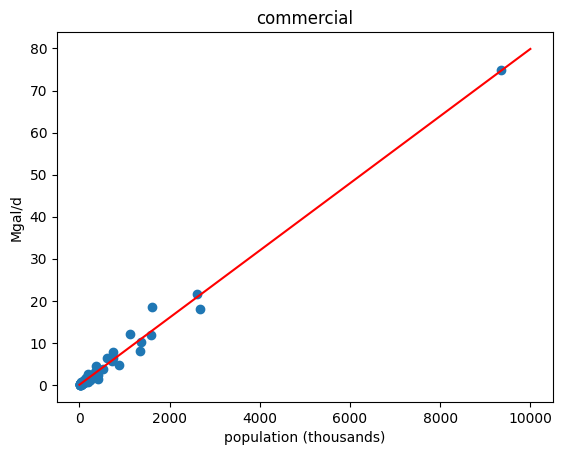

In [9]:
# population vs commercial water use
x_2, y_2 = match_data(population, commercial)
x_2 = np.array(x_2).reshape((-1, 1))
y_2 = np.array(y_2)
model_2 = LinearRegression().fit(x_2, y_2)

model_2.score(x_2, y_2)

x = np.linspace(0, 10000, 100)

y_eq = model_2.intercept_ + model_2.coef_ * x

print(f"y = {model_2.intercept_} + {model_2.coef_} * x")

plt.clf()

plt.xlabel('population (thousands)')
plt.ylabel('Mgal/d')
plt.scatter(*match_data(population, commercial))
plt.title('commercial')

plt.plot(x, y_eq, 'r')

plt.savefig("commercial")

In [10]:
# surface vs groundwater

groundwater = df['Public Supply total self-supplied withdrawals, groundwater, in Mgal/d']
surfacewater = df['Public Supply total self-supplied withdrawals, surface water, in Mgal/d']

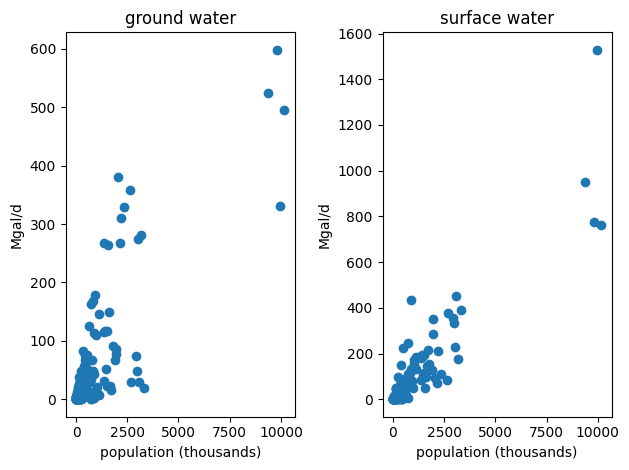

In [11]:
plt.clf()

plt.subplot(1, 2, 1)
plt.xlabel('population (thousands)')
plt.ylabel('Mgal/d')
plt.scatter(*match_data(population, groundwater))
plt.title('ground water')

plt.subplot(1, 2, 2)
plt.xlabel('population (thousands)')
plt.ylabel('Mgal/d')
plt.scatter(*match_data(population, surfacewater))
plt.title('surface water')

plt.tight_layout()

plt.savefig("ground_surface_plots")

y = 7.193477398965072 + [0.05212817] * x


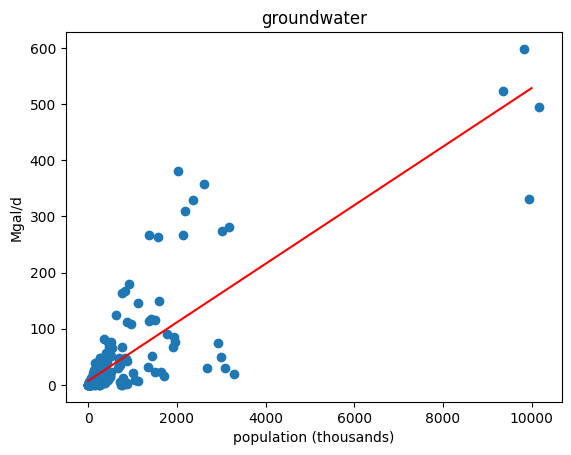

In [12]:
x_1, y_1 = match_data(population, groundwater)
x_1 = np.array(x_1).reshape((-1, 1))
y_1 = np.array(y_1)
model_1 = LinearRegression().fit(x_1, y_1)

model_1.score(x_1, y_1)

x = np.linspace(0, 10000, 100)

y_eq = model_1.intercept_ + model_1.coef_ * x

f1 = lambda x: model_1.intercept_ + model_1.coef_ * x

print(f"y = {model_1.intercept_} + {model_1.coef_} * x")

plt.clf()

plt.xlabel('population (thousands)')
plt.ylabel('Mgal/d')
plt.scatter(*match_data(population, groundwater))
plt.title('groundwater')

plt.plot(x, y_eq, 'r')

plt.savefig("groundwater")

y = 0.9360346854575639 + [0.10119551] * x


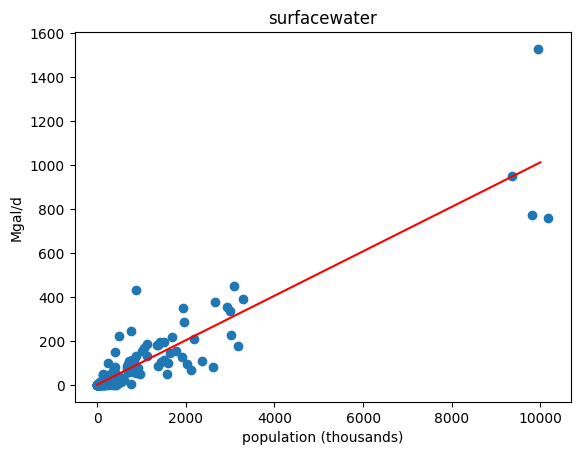

In [13]:
x_2, y_2 = match_data(population, surfacewater)
x_2 = np.array(x_2).reshape((-1, 1))
y_2 = np.array(y_2)
model_2 = LinearRegression().fit(x_2, y_2)

model_2.score(x_2, y_2)

x = np.linspace(0, 10000, 100)

y_eq = model_2.intercept_ + model_2.coef_ * x
f2 = lambda x: model_2.intercept_ + model_2.coef_ * x

print(f"y = {model_2.intercept_} + {model_2.coef_} * x")

plt.clf()

plt.xlabel('population (thousands)')
plt.ylabel('Mgal/d')
plt.scatter(*match_data(population, surfacewater))
plt.title('surfacewater')

plt.plot(x, y_eq, 'r')

plt.savefig("surfacewater")

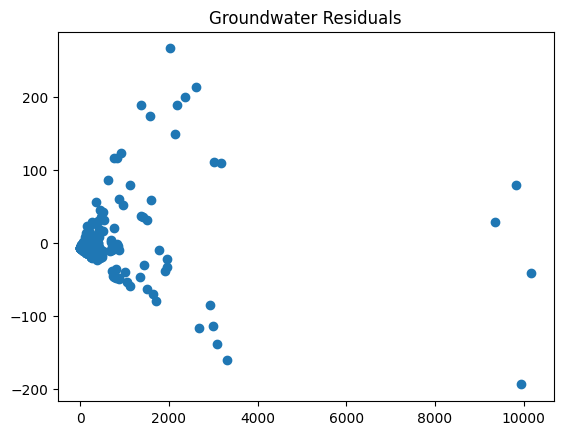

In [14]:
# residuals

x_1, y_1 = match_data(population, groundwater)
y_residuals_1 = []
for i in range(len(x_1)):
    y_residuals_1.append(y_1[i] - f1(x_1[i]) )

plt.clf()
plt.title("Groundwater Residuals")

plt.scatter(x_1, y_residuals_1)

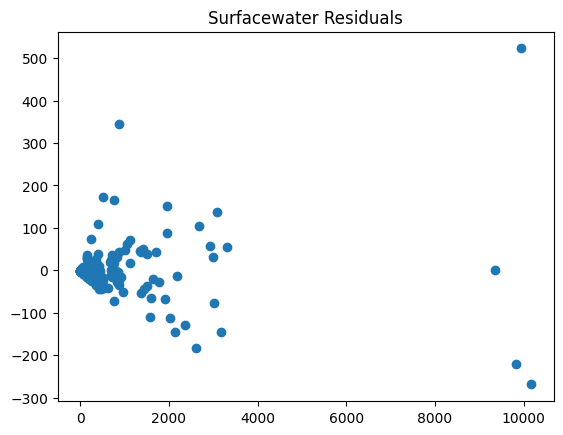

In [15]:
x_2, y_2 = match_data(population, surfacewater)
y_residuals_2 = []
for i in range(len(x_1)):
    y_residuals_2.append(y_2[i] - f2(x_2[i]) )

plt.clf()
plt.title("Surfacewater Residuals")

plt.scatter(x_2, y_residuals_2)

y = 7.193477398965072 + [0.05212817] * x
max: y = -0.3309600825877492 + 0.3251892635925671 * x
min: y = 0.029371754418236085 + 0.0005659870105981069 * x


656.0680303900357

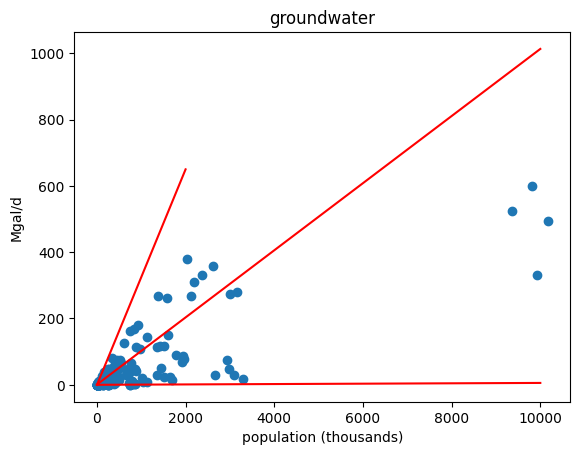

In [18]:
normalizing = []

for i in range(len(x_1)):
    if y_1[i] != 0.0:
        normalizing.append(y_1[i] / x_1[i])
    else:
        normalizing.append(0.01)

min_normal = normalizing.index(min(normalizing))

max_normal = normalizing.index(max(normalizing))

# groundwater_min_index = list(y_residuals_1).index(min(y_residuals_1))

groundwater_min = (x_1[min_normal], y_1[min_normal])
groundwater_max = (x_1[max_normal], y_1[max_normal])

origin_index = list(x_1).index(min(x_1))

slope_min = (groundwater_min[1] - y_1[origin_index]) / (groundwater_min[0] - x_1[origin_index])

min_line = slope_min * x + groundwater_min[1] - slope_min * groundwater_min[0]

slope_max = (groundwater_max[1] - y_1[origin_index]) / (groundwater_max[0] - x_1[origin_index])

max_line = groundwater_max[1] - slope_max * groundwater_max[0] + slope_max * x
f1 = lambda x: groundwater_max[1] - slope_max * groundwater_max[0] + slope_max * x

x = np.linspace(0, 10000, 100)

x_small = [i for i in range(2000)]
y_small = [f1(i) for i in x_small]

print(f"y = {model_1.intercept_} + {model_1.coef_} * x")

plt.clf()

plt.xlabel('population (thousands)')
plt.ylabel('Mgal/d')
plt.scatter(*match_data(population, groundwater))
plt.title('groundwater')

plt.plot(x, y_eq, 'r')
plt.plot(x, min_line, 'r')
plt.plot(x_small, y_small, 'r')

plt.savefig("groundwater")


print(f"max: y = {groundwater_max[1] - slope_max * groundwater_max[0]} + {slope_max} * x")
print(f"min: y = {groundwater_min[1] - slope_min * groundwater_min[0]} + {slope_min} * x")

groundwater_max[1] - slope_min * groundwater_max[0] + slope_max * 2000

y = 7.193477398965072 + [0.05212817] * x
max: y = 433.36027745686107 + 0.4943329750796943 * x
min: y = 0.07002564766121058 + -2.310600109060327e-05 * x


1.11

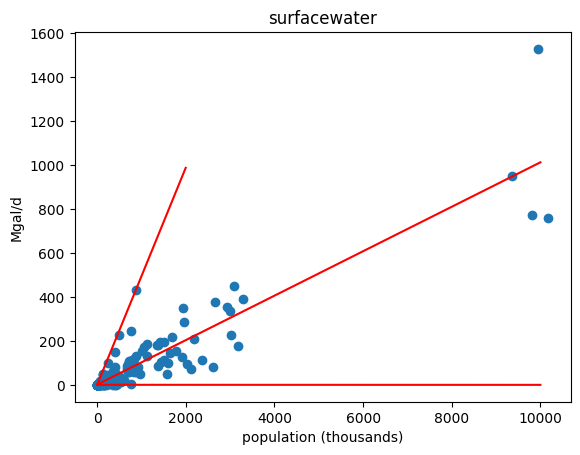

In [19]:
normalizing = []

for i in range(len(x_1)):
    if y_2[i] != 0.0:
        normalizing.append(y_2[i] / x_2[i])
    else:
        normalizing.append(0.01)

min_normal = normalizing.index(min(normalizing))

max_normal = normalizing.index(max(normalizing))

surfacewater_min = (x_2[min_normal], y_2[min_normal])
surfacewater_max = (x_2[max_normal], y_2[max_normal])

origin_index = list(x_2).index(min(x_2))

slope_min = (surfacewater_min[1] - y_2[origin_index]) / (surfacewater_min[0] - x_2[origin_index])

min_line = slope_min * x + surfacewater_min[1] - slope_min * surfacewater_min[0]

slope_max = (surfacewater_max[1] - y_2[origin_index]) / (surfacewater_max[0] - x_2[origin_index])

max_line = surfacewater_max[1] - slope_max * surfacewater_max[0] + slope_max * x
f2 = lambda x: surfacewater_max[1] - slope_max * surfacewater_max[0] + slope_max * x

x = np.linspace(0, 10000, 100)

x_small = [i for i in range(2000)]
y_small = [f2(i) for i in x_small]

print(f"y = {model_1.intercept_} + {model_1.coef_} * x")

plt.clf()

plt.xlabel('population (thousands)')
plt.ylabel('Mgal/d')
plt.scatter(*match_data(population, surfacewater))
plt.title('surfacewater')

plt.plot(x, y_eq, 'r')
plt.plot(x, min_line, 'r')
plt.plot(x_small, y_small, 'r')

plt.savefig("surfacewater")


print(f"max: y = {surfacewater_max[1] - slope_min * surfacewater_max[0]} + {slope_max} * x")
print(f"min: y = {surfacewater_min[1] - slope_min * surfacewater_min[0]} + {slope_min} * x")

x_2[origin_index]